# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [2]:

#Functions to save objects for later use and retireve it
import pickle
def savetofile(obj,filename):
    pickle.dump(obj,open(filename+".pkl","wb"))
def openfromfile(filename):
    temp = pickle.load(open(filename+".pkl","rb"))
    return temp

## 1.1 Reading Data

In [3]:
project_data = pd.read_csv('../train_data.csv')
resource_data = pd.read_csv('../resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:37<00:00, 1124.27it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:

# similarly you can preprocess the titles also
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('!', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())# similarly you can preprocess the titles also

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:04<00:00, 26937.12it/s]


## 1.5 Preparing data for models

In [20]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [21]:
# Combining two tables 

price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [22]:
project_data.columns


Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

In [23]:
# Taking a sample of 30000 points from project data for analysis

X = project_data[0:50000]
y= X['project_is_approved'].values
X.drop(['project_is_approved'], axis=1, inplace=True)
X.drop(['project_title'], axis=1, inplace=True)
X['project_title'] = preprocessed_project_title[:50000]
print(X.shape ,y.shape)



(50000, 19) (50000,)


### 1. Splitting Data

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(33500, 19) (33500,)
(16500, 19) (16500,)


In [25]:
print(type(X_train),type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


### 2. Creating Data Matrix

### 2.1 converting the text to vectors

#### BOW (Essay + Title)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_essay_bow = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

vectorizer_essay_bow.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer_essay_bow.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer_essay_bow.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)


After vectorizations
(33500, 5000) (33500,)
(16500, 5000) (16500,)


In [27]:

vectorizer_title_bow = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

vectorizer_title_bow.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted Countvectorizer_title_bow to convert the text to vector
X_train_title_bow = vectorizer_title_bow.transform(X_train['project_title'].values)
X_test_title_bow = vectorizer_title_bow.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_test_title_bow.shape, y_test.shape)

After vectorizations
(33500, 2886) (33500,)
(16500, 2886) (16500,)


#### TFIDF (Essay + Title)

In [28]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_essay_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

vectorizer_essay_tfidf.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted Countvectorizer_essay_tfidf to convert the text to vector
X_train_essay_tfidf = vectorizer_essay_tfidf.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer_essay_tfidf.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)



After vectorizations
(33500, 5000) (33500,)
(16500, 5000) (16500,)


In [29]:



vectorizer_title_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

vectorizer_title_tfidf.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted Countvectorizer_title_tfidf to convert the text to vector
X_train_title_tfidf = vectorizer_title_tfidf.transform(X_train['project_title'].values)
X_test_title_tfidf = vectorizer_title_tfidf.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_test_title_tfidf.shape, y_test.shape)

After vectorizations
(33500, 2886) (33500,)
(16500, 2886) (16500,)


#### AVG W2V (Essay + Title)

In [30]:
with open('../glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [31]:
X_train_essay_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_essay_avgw2v.append(vector)

print(len(X_train_essay_avgw2v))
print(len(X_train_essay_avgw2v[0]))

print("*"*100)


X_test_essay_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_essay_avgw2v.append(vector)

print(len(X_test_essay_avgw2v))
print(len(X_test_essay_avgw2v[0]))

100%|██████████████████████████████████████████████████████████████████████████| 33500/33500 [00:22<00:00, 1480.66it/s]


33500
300
****************************************************************************************************


100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:09<00:00, 1660.57it/s]


16500
300


In [32]:
X_train_title_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_title_avgw2v.append(vector)

print(len(X_train_title_avgw2v))
print(len(X_train_title_avgw2v[0]))

print("*"*100)

X_test_title_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_title_avgw2v.append(vector)

print(len(X_test_title_avgw2v))
print(len(X_test_title_avgw2v[0]))

100%|█████████████████████████████████████████████████████████████████████████| 33500/33500 [00:00<00:00, 38439.33it/s]


33500
300
****************************************************************************************************


100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 37865.79it/s]


16500
300


#### TFIDF W2V (Essay + Title)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_essay = set(tfidf_model.get_feature_names())

In [34]:
X_train_essay_tfidfw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_essay):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_essay_tfidfw2v.append(vector)

print(len(X_train_essay_tfidfw2v))
print(len(X_train_essay_tfidfw2v[0]))

X_test_essay_tfidfw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_essay):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_essay_tfidfw2v.append(vector)

print(len(X_test_essay_tfidfw2v))
print(len(X_test_essay_tfidfw2v[0]))

100%|███████████████████████████████████████████████████████████████████████████| 33500/33500 [03:13<00:00, 172.82it/s]


33500
300


100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [01:30<00:00, 182.44it/s]


16500
300


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_model.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_title = set(tfidf_model.get_feature_names())

In [36]:
X_train_title_tfidfw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_title_tfidfw2v.append(vector)

print(len(X_train_title_tfidfw2v))
print(len(X_train_title_tfidfw2v[0]))

X_test_title_tfidfw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_title_tfidfw2v.append(vector)

print(len(X_test_title_tfidfw2v))
print(len(X_test_title_tfidfw2v[0]))

100%|█████████████████████████████████████████████████████████████████████████| 33500/33500 [00:01<00:00, 22330.17it/s]


33500
300


100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 21138.88it/s]


16500
300


#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

#### Response Encoding for Categorical Features

In [39]:
# https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python/28663913
# https://stackoverflow.com/questions/21800169/python-pandas-get-index-of-rows-which-column-matches-certain-value

# getting list of all categories
school_states = list(X_train['school_state'].unique())

school_states_response_encoding= {}

for state in school_states:
    
    # first and second elements in the list are the response encoding for class_label = 0 and 1 respectively
    prob_list=[]
    
    # selecting the indexes of the category into a list
    indexes = X_train.index[X_train['school_state'] == state].tolist()
    
    # selecting the count of rows which have class_label 0 and 1 respectively
    zero_count = (y[indexes] == 0).sum()
    one_count =  (y[indexes] == 1).sum()
    
    prob_list.append(float(zero_count)/len(indexes))
    prob_list.append(float(one_count)/len(indexes))
    
    school_states_response_encoding[state] = prob_list

print(school_states_response_encoding)


{'CT': [0.130859375, 0.869140625], 'WI': [0.16083916083916083, 0.8391608391608392], 'FL': [0.17214397496087636, 0.8278560250391236], 'VA': [0.16583747927031509, 0.8341625207296849], 'NY': [0.14051015996541288, 0.8594898400345872], 'CA': [0.14679677556215528, 0.8532032244378447], 'MD': [0.16, 0.84], 'MA': [0.15655853314527504, 0.843441466854725], 'NC': [0.13262099308610936, 0.8673790069138906], 'IL': [0.15765422696115766, 0.8423457730388424], 'AL': [0.14678899082568808, 0.8532110091743119], 'PA': [0.14421052631578948, 0.8557894736842105], 'TX': [0.19853613906678866, 0.8014638609332113], 'OH': [0.11964735516372796, 0.8803526448362721], 'OK': [0.153954802259887, 0.846045197740113], 'SC': [0.13706407137064072, 0.8629359286293593], 'MS': [0.1658653846153846, 0.8341346153846154], 'IN': [0.15508021390374332, 0.8449197860962567], 'AZ': [0.1512481644640235, 0.8487518355359766], 'MN': [0.13279132791327913, 0.8672086720867209], 'AK': [0.19801980198019803, 0.801980198019802], 'ID': [0.165876777251

In [40]:
# https://stackoverflow.com/questions/39564372/create-new-column-in-pandas-based-on-value-of-another-column

def func_state_0(x):
    if x in school_states_response_encoding.keys():
        return school_states_response_encoding[x][0]
    else:
        return 0.5
    
def func_state_1(x):
    if x in school_states_response_encoding.keys():
        return school_states_response_encoding[x][1]
    else:
        return 0.5
    
    

In [41]:
state_0_train = X_train['school_state'].apply(func_state_0)
state_1_train = X_train['school_state'].apply(func_state_1)

state_0_test = X_test['school_state'].apply(func_state_0)
state_1_test = X_test['school_state'].apply(func_state_1)

print(state_0_train.shape, type(state_0_train))
print(state_1_test.shape, type(state_1_test))
print("*" * 50)

(33500,) <class 'pandas.core.series.Series'>
(16500,) <class 'pandas.core.series.Series'>
**************************************************


In [42]:
# https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python/28663913


# getting list of all categories
clean_categories = list(X_train['clean_categories'].unique())

clean_categories_response_encoding= {}

for x in clean_categories:
    
    # first and second elements in the list are the response encoding for class_label = 0 and 1 respectively
    prob_list=[]
    
    # selecting the indexes of the category into a list
    indexes = X_train.index[X_train['clean_categories'] == x ].tolist()
    
    # selecting the count of rows which have class_label 0 and 1 respectively
    zero_count = (y[indexes] == 0).sum()
    one_count =  (y[indexes] == 1).sum()
    
    prob_list.append(float(zero_count)/len(indexes))
    prob_list.append(float(one_count)/len(indexes))
    
    clean_categories_response_encoding[x] = prob_list

print(clean_categories_response_encoding)


{'Literacy_Language Math_Science': [0.13495575221238937, 0.8650442477876106], 'Math_Science SpecialNeeds': [0.15608919382504288, 0.8439108061749572], 'Music_Arts': [0.13901064495929868, 0.8609893550407013], 'Literacy_Language History_Civics': [0.11952191235059761, 0.8804780876494024], 'AppliedLearning SpecialNeeds': [0.17903930131004367, 0.8209606986899564], 'Literacy_Language': [0.1396108314056334, 0.8603891685943665], 'Math_Science': [0.18040737148399613, 0.8195926285160039], 'SpecialNeeds': [0.18017309205350118, 0.8198269079464988], 'Health_Sports': [0.15189068954559898, 0.848109310454401], 'Literacy_Language SpecialNeeds': [0.1437908496732026, 0.8562091503267973], 'AppliedLearning': [0.18923465096719932, 0.8107653490328006], 'Math_Science Literacy_Language': [0.1373134328358209, 0.8626865671641791], 'SpecialNeeds Music_Arts': [0.16279069767441862, 0.8372093023255814], 'AppliedLearning Health_Sports': [0.1694915254237288, 0.8305084745762712], 'History_Civics Math_Science': [0.134453

In [43]:
# https://stackoverflow.com/questions/39564372/create-new-column-in-pandas-based-on-value-of-another-column

def clean_category_0(x):
    if x in clean_categories_response_encoding.keys():
        return clean_categories_response_encoding[x][0]
    else:
        return 0.5
    
def clean_category_1(x):
    if x in clean_categories_response_encoding.keys():
        return clean_categories_response_encoding[x][1]
    else:
        return 0.5
    

category_0_train = X_train['clean_categories'].apply(clean_category_0)
category_1_train = X_train['clean_categories'].apply(clean_category_1)

category_0_test = X_test['clean_categories'].apply(clean_category_0)
category_1_test = X_test['clean_categories'].apply(clean_category_1)

print(category_0_train.shape, type(category_0_train))
print(category_1_test.shape, type(category_1_test))
print("*" * 50)

(33500,) <class 'pandas.core.series.Series'>
(16500,) <class 'pandas.core.series.Series'>
**************************************************


In [44]:
# https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python/28663913

# getting list of all categories
clean_subcategories = list(X_train['clean_subcategories'].unique())

clean_subcategories_response_encoding= {}

for x in clean_subcategories:
    
    # first and second elements in the list are the response encoding for class_label = 0 and 1 respectively
    prob_list=[]
    
    # selecting the indexes of the category into a list
    indexes = X_train.index[X_train['clean_subcategories'] == x].tolist()
    # selecting the count of rows which have class_label 0 and 1 respectively
    zero_count = (y[indexes] == 0).sum()
    one_count =  (y[indexes] == 1).sum()
    
    prob_list.append(float(zero_count)/len(indexes))
    prob_list.append(float(one_count)/len(indexes))
    
    clean_subcategories_response_encoding[x] = prob_list
    
print(clean_subcategories_response_encoding)
    


{'Literacy Mathematics': [0.13180404354587869, 0.8681959564541213], 'Literature_Writing Mathematics': [0.13539967373572595, 0.8646003262642741], 'AppliedSciences SpecialNeeds': [0.12295081967213115, 0.8770491803278688], 'Music': [0.11135371179039301, 0.888646288209607], 'ESL History_Geography': [0.08333333333333333, 0.9166666666666666], 'EarlyDevelopment SpecialNeeds': [0.15584415584415584, 0.8441558441558441], 'ESL Literacy': [0.15007012622720897, 0.8499298737727911], 'Literacy': [0.11744853189335133, 0.8825514681066486], 'AppliedSciences': [0.19400855920114124, 0.8059914407988588], 'SpecialNeeds': [0.18017309205350118, 0.8198269079464988], 'Health_Wellness NutritionEducation': [0.1721311475409836, 0.8278688524590164], 'Health_Wellness': [0.12727272727272726, 0.8727272727272727], 'Music PerformingArts': [0.11224489795918367, 0.8877551020408163], 'Literacy SpecialNeeds': [0.12101063829787234, 0.8789893617021277], 'CharacterEducation': [0.2032520325203252, 0.7967479674796748], 'TeamSpor

In [45]:
# https://stackoverflow.com/questions/39564372/create-new-column-in-pandas-based-on-value-of-another-column

def clean_subcategory_0(x):
    if x in clean_subcategories_response_encoding.keys():
        return clean_subcategories_response_encoding[x][0]
    else:
        return 0.5
    
def clean_subcategory_1(x):
    if x in clean_subcategories_response_encoding.keys():
        return clean_subcategories_response_encoding[x][1]
    else:
        return 0.5
    

subcategory_0_train = X_train['clean_subcategories'].apply(clean_subcategory_0)
subcategory_1_train = X_train['clean_subcategories'].apply(clean_subcategory_1)

subcategory_0_test = X_test['clean_subcategories'].apply(clean_subcategory_0)
subcategory_1_test = X_test['clean_subcategories'].apply(clean_subcategory_1)

print(subcategory_0_train.shape, type(subcategory_0_train))
print(subcategory_1_test.shape, type(subcategory_1_test))
print("*" * 50)

(33500,) <class 'pandas.core.series.Series'>
(16500,) <class 'pandas.core.series.Series'>
**************************************************


In [46]:
#Feature Encoding for teacher_prefix
#We have nan values of teacher prefix which is causing issues with count vectorizer
#Replaced the nan values with Mrs.

X_train['teacher_prefix'] =  X_train['teacher_prefix'].fillna('Mrs.')
X_test['teacher_prefix'] =  X_test['teacher_prefix'].fillna('Mrs.')
print(list(X_train['teacher_prefix'].value_counts()) , list(X_test['teacher_prefix'].value_counts()))

[17525, 12073, 3187, 715] [8617, 5863, 1672, 346, 2]


In [47]:
# https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python/28663913

# getting list of all categories
prefixes = list(X_train['teacher_prefix'].unique())

prefixes_response_encoding= {}

for x in prefixes:
    
    # first and second elements in the list are the response encoding for class_label = 0 and 1 respectively
    prob_list=[]
    
    # selecting the indexes of the category into a list
    indexes = X_train.index[X_train['teacher_prefix'] == x].tolist()
    
    # selecting the count of rows which have class_label 0 and 1 respectively
    zero_count = (y[indexes] == 0).sum()
    one_count =  (y[indexes] == 1).sum()
    
    prob_list.append(float(zero_count)/len(indexes))
    prob_list.append(float(one_count)/len(indexes))
    
    prefixes_response_encoding[x] = prob_list
    
print(prefixes_response_encoding)   


{'Ms.': [0.1553052265385571, 0.8446947734614428], 'Mrs.': [0.150527817403709, 0.849472182596291], 'Mr.': [0.15971132726702228, 0.8402886727329777], 'Teacher': [0.2041958041958042, 0.7958041958041958]}


In [48]:
# https://stackoverflow.com/questions/39564372/create-new-column-in-pandas-based-on-value-of-another-column

def prefix_0(x):
    if x in prefixes_response_encoding.keys():
        return prefixes_response_encoding[x][0]
    else:
        return 0.5
    
def prefix_1(x):
    if x in prefixes_response_encoding.keys():
        return prefixes_response_encoding[x][1]
    else:
        return 0.5
    

teacher_prefix_0_train = X_train['teacher_prefix'].apply(prefix_0)
teacher_prefix_1_train = X_train['teacher_prefix'].apply(prefix_1)



teacher_prefix_0_test = X_test['teacher_prefix'].apply(prefix_0)
teacher_prefix_1_test = X_test['teacher_prefix'].apply(prefix_1)

print(teacher_prefix_0_train.shape, type(teacher_prefix_0_train))
print(teacher_prefix_1_test.shape, type(teacher_prefix_1_test))
print("*" * 50)

(33500,) <class 'pandas.core.series.Series'>
(16500,) <class 'pandas.core.series.Series'>
**************************************************


In [49]:
#Grade category is like this 'Grades 3-5'
#Converting it to'Grades_3_5 for one hot encoding
#If not converted it throws error

grade_category_processed = []
grade_category=[]
grade_category = X_train['project_grade_category']
for grade in grade_category:
    grade=grade.replace(" ","_")
    grade=grade.replace("-","_")
    grade_category_processed.append(grade)
print(len(grade_category_processed),project_data['project_grade_category'].shape)
print(grade_category_processed[5],project_data['project_grade_category'].values[5])


grade_category_processed1 = []
grade_category1=[]
grade_category1 = X_test['project_grade_category']
for grade in grade_category1:
    grade=grade.replace(" ","_")
    grade=grade.replace("-","_")
    grade_category_processed1.append(grade)
print(len(grade_category_processed1),project_data['project_grade_category'].shape)
print(grade_category_processed1[5],project_data['project_grade_category'].values[5])

X_train.drop(['project_grade_category'], axis=1, inplace=True)
X_train['project_grade_category'] = grade_category_processed

X_test.drop(['project_grade_category'], axis=1, inplace=True)
X_test['project_grade_category'] = grade_category_processed1



33500 (109248,)
Grades_6_8 Grades 3-5
16500 (109248,)
Grades_PreK_2 Grades 3-5


In [50]:
# https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python/28663913

# getting list of all categories
grades = list(X_train['project_grade_category'].unique())

grades_response_encoding= {}

for x in grades:
    
    # first and second elements in the list are the response encoding for class_label = 0 and 1 respectively
    prob_list=[]
    
    # selecting the indexes of the category into a list
    indexes = X_train.index[X_train['project_grade_category'] == x].tolist()
    
    
    # selecting the count of rows which have class_label 0 and 1 respectively
    zero_count = (y[indexes] == 0).sum()
    one_count =  (y[indexes] == 1).sum()
    
    prob_list.append(float(zero_count)/len(indexes))
    prob_list.append(float(one_count)/len(indexes))
    
    grades_response_encoding[x] = prob_list
    
print(grades_response_encoding) 
    


{'Grades_PreK_2': [0.15416208287495417, 0.8458379171250459], 'Grades_3_5': [0.14906505135633394, 0.850934948643666], 'Grades_6_8': [0.15715926493108728, 0.8428407350689127], 'Grades_9_12': [0.1683076923076923, 0.8316923076923077]}


In [51]:
# https://stackoverflow.com/questions/39564372/create-new-column-in-pandas-based-on-value-of-another-column

def grade_0(x):
    if x in grades_response_encoding.keys():
        return grades_response_encoding[x][0]
    else:
        return 0.5
    
def grade_1(x):
    if x in grades_response_encoding.keys():
        return grades_response_encoding[x][1]
    else:
        return 0.5
    

project_grade_0_train = X_train['project_grade_category'].apply(grade_0)
project_grade_1_train = X_train['project_grade_category'].apply(grade_1)


project_grade_0_test = X_test['project_grade_category'].apply(grade_0)
project_grade_1_test = X_test['project_grade_category'].apply(grade_1)

print(project_grade_0_train.shape, type(project_grade_0_train))
print(project_grade_1_test.shape, type(project_grade_1_test))
print("*" * 50)

(33500,) <class 'pandas.core.series.Series'>
(16500,) <class 'pandas.core.series.Series'>
**************************************************


#### Normalizing Numerical Features

In [52]:
from sklearn.preprocessing import Normalizer
normalizer_price = Normalizer()
# normalizer_price.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer_price.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer_price.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer_price.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


In [53]:
from sklearn.preprocessing import Normalizer
normalizer_quantity = Normalizer()
# normalizer_quantity.fit(X_train['quantity'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer_quantity.fit(X_train['quantity'].values.reshape(-1,1))

X_train_quantity_norm = normalizer_quantity.transform(X_train['quantity'].values.reshape(-1,1))
X_test_quantity_norm = normalizer_quantity.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


In [54]:
from sklearn.preprocessing import Normalizer
normalizer_prev_posted = Normalizer()
# normalizer_prev_posted.fit(X_train['prev_posted'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer_prev_posted.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_prev_posted_norm = normalizer_prev_posted.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_prev_posted_norm = normalizer_prev_posted.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_prev_posted_norm.shape, y_train.shape)
print(X_test_prev_posted_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


In [55]:
#Testing the shape of all the encoded vectors

print(state_0_train.values.reshape(-1,1).shape)
print(category_0_train.values.reshape(-1,1).shape)
print(subcategory_0_train.values.reshape(-1,1).shape)
print(teacher_prefix_0_train.values.reshape(-1,1).shape)
print(project_grade_0_train.values.reshape(-1,1).shape)


print(X_train_price_norm.shape)
print(X_train_quantity_norm.shape)
print(X_train_prev_posted_norm.shape)



print(X_train_essay_bow.shape)
print(X_train_title_bow.shape)
print(X_train_essay_tfidf.shape)
print(X_train_title_tfidf.shape)

(33500, 1)
(33500, 1)
(33500, 1)
(33500, 1)
(33500, 1)
(33500, 1)
(33500, 1)
(33500, 1)
(33500, 5000)
(33500, 2886)
(33500, 5000)
(33500, 2886)


<h1>2. Random Forest and GBDT </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
# Done in above cells

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [57]:
# Since avg w2v and tfidf does not produce sparse vectors
# hstack doesn't work
# hstack works when there is atleast one sparse matrix
# make atleast one sparse matrix when combining data for shstack
# https://stackoverflow.com/questions/31900567/scipy-sparse-hstack1-2-valueerror-blocks-must-be-2-d-why

from scipy import sparse
X_train_price_norm = sparse.csr_matrix(X_train_price_norm) 
X_test_price_norm = sparse.csr_matrix(X_test_price_norm) 


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [58]:
# Train data


from scipy.sparse import hstack
X_train_bow = hstack((state_0_train.values.reshape(-1,1) , state_1_train.values.reshape(-1,1) , category_0_train.values.reshape(-1,1), category_1_train.values.reshape(-1,1), \
                      subcategory_0_train.values.reshape(-1,1) , subcategory_1_train.values.reshape(-1,1) , teacher_prefix_0_train.values.reshape(-1,1), teacher_prefix_1_train.values.reshape(-1,1),\
                      project_grade_0_train.values.reshape(-1,1) , project_grade_1_train.values.reshape(-1,1) , \
                    X_train_price_norm, X_train_quantity_norm , X_train_prev_posted_norm ,\
                    X_train_essay_bow , X_train_title_bow)).tocsr()


X_train_tfidf = hstack((state_0_train.values.reshape(-1,1) , state_1_train.values.reshape(-1,1) , category_0_train.values.reshape(-1,1), category_1_train.values.reshape(-1,1), \
                      subcategory_0_train.values.reshape(-1,1) , subcategory_1_train.values.reshape(-1,1) , teacher_prefix_0_train.values.reshape(-1,1), teacher_prefix_1_train.values.reshape(-1,1),\
                      project_grade_0_train.values.reshape(-1,1) , project_grade_1_train.values.reshape(-1,1) , \
                    X_train_price_norm, X_train_quantity_norm , X_train_prev_posted_norm ,\
                    X_train_essay_tfidf , X_train_title_tfidf)).tocsr()

X_train_avg_w2v = hstack((state_0_train.values.reshape(-1,1) , state_1_train.values.reshape(-1,1) , category_0_train.values.reshape(-1,1), category_1_train.values.reshape(-1,1), \
                      subcategory_0_train.values.reshape(-1,1) , subcategory_1_train.values.reshape(-1,1) , teacher_prefix_0_train.values.reshape(-1,1), teacher_prefix_1_train.values.reshape(-1,1),\
                      project_grade_0_train.values.reshape(-1,1) , project_grade_1_train.values.reshape(-1,1) , \
                    X_train_price_norm, X_train_quantity_norm , X_train_prev_posted_norm ,\
                    X_train_essay_avgw2v , X_train_title_avgw2v)).tocsr()

X_train_tfidf_w2v = hstack((state_0_train.values.reshape(-1,1) , state_1_train.values.reshape(-1,1) , category_0_train.values.reshape(-1,1), category_1_train.values.reshape(-1,1), \
                      subcategory_0_train.values.reshape(-1,1) , subcategory_1_train.values.reshape(-1,1) , teacher_prefix_0_train.values.reshape(-1,1), teacher_prefix_1_train.values.reshape(-1,1),\
                      project_grade_0_train.values.reshape(-1,1) , project_grade_1_train.values.reshape(-1,1) , \
                    X_train_price_norm, X_train_quantity_norm , X_train_prev_posted_norm ,\
                    X_train_essay_tfidfw2v , X_train_title_tfidfw2v)).tocsr()


print(X_train_bow.shape)
print(X_train_tfidf.shape)
print(X_train_avg_w2v.shape)
print(X_train_tfidf_w2v.shape)

(33500, 7899)
(33500, 7899)
(33500, 613)
(33500, 613)


In [59]:
# test data

X_test_bow = hstack((state_0_test.values.reshape(-1,1) , state_1_test.values.reshape(-1,1) , category_0_test.values.reshape(-1,1), category_1_test.values.reshape(-1,1), \
                      subcategory_0_test.values.reshape(-1,1) , subcategory_1_test.values.reshape(-1,1) , teacher_prefix_0_test.values.reshape(-1,1), teacher_prefix_1_test.values.reshape(-1,1),\
                      project_grade_0_test.values.reshape(-1,1) , project_grade_1_test.values.reshape(-1,1) , \
                    X_test_price_norm, X_test_quantity_norm , X_test_prev_posted_norm ,\
                    X_test_essay_bow , X_test_title_bow)).tocsr()


X_test_tfidf = hstack((state_0_test.values.reshape(-1,1) , state_1_test.values.reshape(-1,1) , category_0_test.values.reshape(-1,1), category_1_test.values.reshape(-1,1), \
                      subcategory_0_test.values.reshape(-1,1) , subcategory_1_test.values.reshape(-1,1) , teacher_prefix_0_test.values.reshape(-1,1), teacher_prefix_1_test.values.reshape(-1,1),\
                      project_grade_0_test.values.reshape(-1,1) , project_grade_1_test.values.reshape(-1,1) , \
                    X_test_price_norm, X_test_quantity_norm , X_test_prev_posted_norm ,\
                    X_test_essay_tfidf , X_test_title_tfidf)).tocsr()

X_test_avg_w2v = hstack((state_0_test.values.reshape(-1,1) , state_1_test.values.reshape(-1,1) , category_0_test.values.reshape(-1,1), category_1_test.values.reshape(-1,1), \
                      subcategory_0_test.values.reshape(-1,1) , subcategory_1_test.values.reshape(-1,1) , teacher_prefix_0_test.values.reshape(-1,1), teacher_prefix_1_test.values.reshape(-1,1),\
                      project_grade_0_test.values.reshape(-1,1) , project_grade_1_test.values.reshape(-1,1) , \
                    X_test_price_norm, X_test_quantity_norm , X_test_prev_posted_norm ,\
                    X_test_essay_avgw2v , X_test_title_avgw2v)).tocsr()

X_test_tfidf_w2v = hstack((state_0_test.values.reshape(-1,1) , state_1_test.values.reshape(-1,1) , category_0_test.values.reshape(-1,1), category_1_test.values.reshape(-1,1), \
                      subcategory_0_test.values.reshape(-1,1) , subcategory_1_test.values.reshape(-1,1) , teacher_prefix_0_test.values.reshape(-1,1), teacher_prefix_1_test.values.reshape(-1,1),\
                      project_grade_0_test.values.reshape(-1,1) , project_grade_1_test.values.reshape(-1,1) , \
                    X_test_price_norm, X_test_quantity_norm , X_test_prev_posted_norm ,\
                    X_test_essay_tfidfw2v , X_test_title_tfidfw2v)).tocsr()


print(X_test_bow.shape)
print(X_test_tfidf.shape)
print(X_test_avg_w2v.shape)
print(X_test_tfidf_w2v.shape)

(16500, 7899)
(16500, 7899)
(16500, 613)
(16500, 613)


In [107]:
# Checking the type of test and train data

print(type(X_train_bow))
print(type(X_test_bow))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>


### RandomForest

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

RF =  RandomForestClassifier(class_weight = 'balanced' , n_jobs = -1)
#Performing Naive Bayes using gridsearchcv
parameters = {'n_estimators' : [1, 5, 10, 50, 100, 500]  ,'max_depth':[1, 5, 10 ,20 ,30 ,40 ,50] }

model = GridSearchCV(RF,parameters,cv=3,scoring='roc_auc')
model.fit(X_train_bow,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 50, 100, 500], 'max_depth': [1, 5, 10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [109]:
# Printing the best hyperparameter and AUC we get when we use obtained hyperparameter for building the model

print("Best HyperParameter from GridSearch: ",model.best_params_)
print("Best AUC Score: %.2f%%"%(model.best_score_*100))

optimal_n_estimators_bow = model.best_params_['n_estimators']
optimal_max_depth_bow = model.best_params_['max_depth']
print(optimal_n_estimators_bow , optimal_max_depth_bow)
print(model.best_index_)

Best HyperParameter from GridSearch:  {'max_depth': 10, 'n_estimators': 500}
Best AUC Score: 68.55%
500 10
17


(7, 6) (7, 6)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


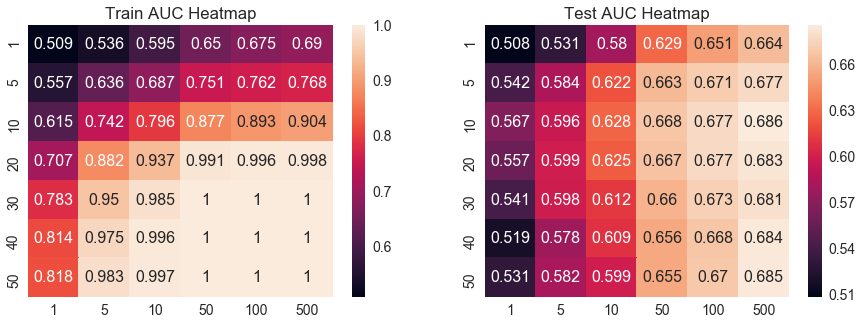

In [110]:
#Plotting the AUC for Train and CV for Various hyperparameter

train_auc_bow= model.cv_results_['mean_train_score']

cv_auc_bow = model.cv_results_['mean_test_score'] 


# since we are using both hyperparameter 'n_estimators' and 'max_depth' in parameter grid for GridserachCV
# we get 6 values for each hyperparameter max_depth . one each for n_estimators = [1, 5, 10, 50, 100, 500](len of list is 6) respectively
# we will get keys of param_grid in sorted order and cross product of values is taken (so max_deth each value is checked against
# each value of n_esimators)

# Reshaping to form a matrix of 6 columns(n_estimators) and 7 rows(max_depth)
train_auc_matrix = train_auc_bow.reshape(7,6)
cv_auc_matrix =    cv_auc_bow.reshape(7,6)


print(train_auc_matrix.shape, cv_auc_matrix.shape)

print(type(train_auc_matrix) ,  type(cv_auc_matrix))

# Rounding the values in the matrix to two decimal points
train_auc_matrix = np.matrix.round(train_auc_matrix ,3)
cv_auc_matrix = np.matrix.round(cv_auc_matrix ,3)


# plotting the graphs
# Y-axis = max_depth
# X-axis = n_estimators

plt.figure(figsize=(15,5))

df_train =  pd.DataFrame(data = train_auc_matrix , columns =parameters['n_estimators'] , index=parameters['max_depth'])
plt.subplot(1,2,1)
plt.ylabel('max_depth')
plt.xlabel('n_estimators')
plt.title("Train AUC Heatmap")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_train, annot=True,annot_kws={"size": 16}, fmt='g' , xticklabels =True ,yticklabels =True)


df_cv =  pd.DataFrame(data = cv_auc_matrix , columns =parameters['n_estimators'] , index=parameters['max_depth'])
plt.subplot(1,2,2)
plt.ylabel('max_depth')
plt.xlabel('n_estimators')
plt.title("Test AUC Heatmap")
sns.set(font_scale=1.4)#for label size

fig =sns.heatmap(df_cv, annot=True,annot_kws={"size": 16}, fmt='g', xticklabels =True ,yticklabels =True)

plt.show()



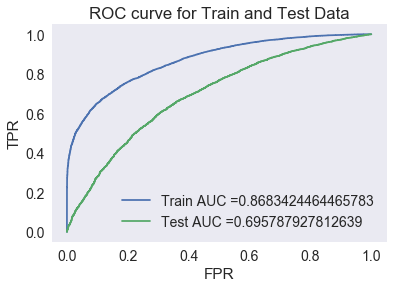

In [111]:
import math

clf = RandomForestClassifier(class_weight = 'balanced' , n_jobs = -1 , n_estimators= optimal_n_estimators_bow , max_depth=optimal_max_depth_bow)
clf.fit(X_train_bow, y_train)


# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

# y_train_pred = batch_predict_proba(neigh, X_train_bow)    
# y_test_pred = batch_predict_proba(neigh, X_test_bow)

y_train_pred = clf.predict_proba(X_train_bow)[:,1]
y_test_pred = clf.predict_proba(X_test_bow)[:,1]



train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for Train and Test Data")
plt.grid()
plt.show()


##### AUC value for test data is 0.6957

In [116]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshold, fpr, tpr):
    
    t = threshold[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.6081856114846127 for threshold 0.506
Classification Report: 

             precision    recall  f1-score   support

          0       0.37      0.82      0.51      5168
          1       0.96      0.74      0.84     28332

avg / total       0.87      0.76      0.79     33500

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]

[[ 4223   945]
 [ 7245 21087]]


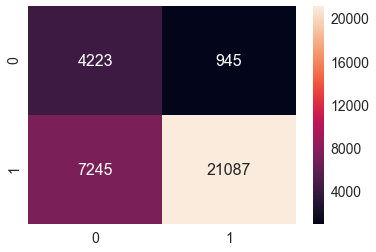

In [112]:
print("="*100)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_train  = predict(y_train_pred, train_thresholds, train_fpr, train_tpr)

print("Classification Report: \n")
print(classification_report(y_train, custom_predict_train))
print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_train, custom_predict_train))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, custom_predict_train), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


the maximum value of tpr*(1-fpr) 0.4221268603235792 for threshold 0.512
Classification Report: 

             precision    recall  f1-score   support

          0       0.25      0.64      0.36      2546
          1       0.91      0.66      0.76     13954

avg / total       0.81      0.66      0.70     16500

Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

[[1634  912]
 [4776 9178]]


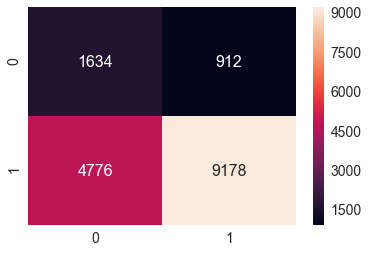

In [113]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_test  = predict(y_test_pred, test_thresholds, test_fpr, test_tpr)

print("Classification Report: \n")
print(classification_report(y_test, custom_predict_test))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_test, custom_predict_test))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, custom_predict_test), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

RF =  RandomForestClassifier(class_weight = 'balanced' , n_jobs = -1)
#Performing Naive Bayes using gridsearchcv
parameters = {'n_estimators' : [1, 5, 10, 50, 100, 500]  ,'max_depth':[1, 5, 10 ,20 ,30 ,40 ,50] }

model_tfidf = GridSearchCV(RF,parameters,cv=3,scoring='roc_auc')
model_tfidf.fit(X_train_tfidf,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 50, 100, 500], 'max_depth': [1, 5, 10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [133]:
# Printing the best hyperparameter and AUC we get when we use obtained hyperparameter for building the model

print("Best HyperParameter from GridSearch: ",model_tfidf.best_params_)
print("Best AUC Score: %.2f%%"%(model_tfidf.best_score_*100))

optimal_n_estimators_tfidf = model_tfidf.best_params_['n_estimators']
optimal_max_depth_tfidf = model_tfidf.best_params_['max_depth']
print(optimal_n_estimators_tfidf , optimal_max_depth_tfidf)


Best HyperParameter from GridSearch:  {'max_depth': 10, 'n_estimators': 500}
Best AUC Score: 68.98%
500 10


(7, 6) (7, 6)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


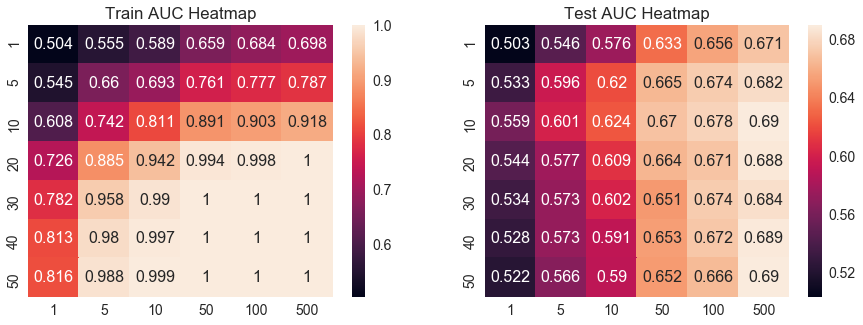

In [168]:
#Plotting the AUC for Train and CV for Various hyperparameter

train_auc_tfidf= model_tfidf.cv_results_['mean_train_score']

cv_auc_tfidf = model_tfidf.cv_results_['mean_test_score'] 


# since we are using both hyperparameter 'n_estimators' and 'max_depth' in parameter grid for GridserachCV
# we get 6 values for each hyperparameter max_depth . one each for n_estimators = [1, 5, 10, 50, 100, 500](len of list is 6) respectively
# we will get keys of param_grid in sorted order and cross product of values is taken (so max_deth each value is checked against
# each value of n_esimators)

# Reshaping to form a matrix of 6 columns(n_estimators) and 7 rows(max_depth)
train_auc_matrix = train_auc_tfidf.reshape(7,6)
cv_auc_matrix =    cv_auc_tfidf.reshape(7,6)


print(train_auc_matrix.shape, cv_auc_matrix.shape)

print(type(train_auc_matrix) ,  type(cv_auc_matrix))

# Rounding the values in the matrix to two decimal points
train_auc_matrix = np.matrix.round(train_auc_matrix ,3)
cv_auc_matrix = np.matrix.round(cv_auc_matrix ,3)


# plotting the graphs
# Y-axis = max_depth
# X-axis = n_estimators

plt.figure(figsize=(15,5))

df_train =  pd.DataFrame(data = train_auc_matrix , columns =parameters['n_estimators'] , index=parameters['max_depth'])
plt.subplot(1,2,1)
plt.ylabel('max_depth')
plt.xlabel('n_estimators')
plt.title("Train AUC Heatmap")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_train, annot=True,annot_kws={"size": 16}, fmt='g' , xticklabels =True ,yticklabels =True)


df_cv =  pd.DataFrame(data = cv_auc_matrix , columns =parameters['n_estimators'] , index=parameters['max_depth'])
plt.subplot(1,2,2)
plt.ylabel('max_depth')
plt.xlabel('n_estimators')
plt.title("Test AUC Heatmap")
sns.set(font_scale=1.4)#for label size

fig =sns.heatmap(df_cv, annot=True,annot_kws={"size": 16}, fmt='g', xticklabels =True ,yticklabels =True)

plt.show()





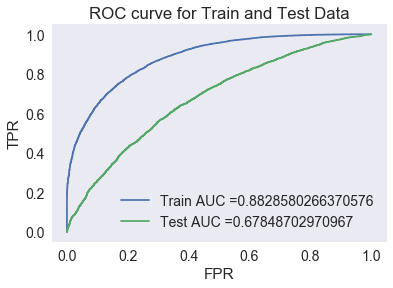

In [135]:
import math

clf = RandomForestClassifier(class_weight = 'balanced' , n_jobs = -1 , n_estimators= optimal_n_estimators_tfidf , max_depth=optimal_max_depth_tfidf)
clf.fit(X_train_tfidf, y_train)


# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

# y_train_pred = batch_predict_proba(neigh, X_train_tfidf)    
# y_test_pred = batch_predict_proba(neigh, X_test_tfidf)

y_train_pred = clf.predict_proba(X_train_tfidf)[:,1]
y_test_pred = clf.predict_proba(X_test_tfidf)[:,1]



train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for Train and Test Data")
plt.grid()
plt.show()


##### AUC for test data is 0.6784

the maximum value of tpr*(1-fpr) 0.6273144277996984 for threshold 0.506
Classification Report: 

             precision    recall  f1-score   support

          0       0.41      0.79      0.54      5168
          1       0.95      0.79      0.87     28332

avg / total       0.87      0.79      0.82     33500

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]

[[ 4087  1081]
 [ 5858 22474]]


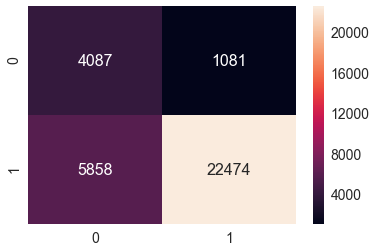

In [136]:
print("="*100)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_train  = predict(y_train_pred, train_thresholds, train_fpr, train_tpr)

print("Classification Report: \n")
print(classification_report(y_train, custom_predict_train))
print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_train, custom_predict_train))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, custom_predict_train), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


the maximum value of tpr*(1-fpr) 0.4012478268569796 for threshold 0.519
Classification Report: 

             precision    recall  f1-score   support

          0       0.24      0.63      0.35      2546
          1       0.90      0.64      0.75     13954

avg / total       0.80      0.64      0.69     16500

Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

[[1599  947]
 [5039 8915]]


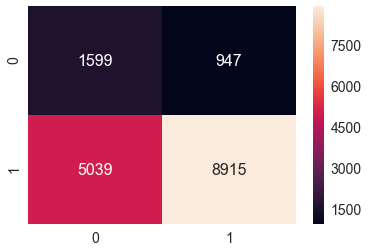

In [137]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_test  = predict(y_test_pred, test_thresholds, test_fpr, test_tpr)

print("Classification Report: \n")
print(classification_report(y_test, custom_predict_test))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_test, custom_predict_test))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, custom_predict_test), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [138]:
# saving a model to harddisk using pickle

savetofile(clf,'RFDT_TFIDF')
openfromfile('RFDT_TFIDF')

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

RF =  RandomForestClassifier(class_weight = 'balanced' , n_jobs = -1)
#Performing Naive Bayes using gridsearchcv
parameters = {'n_estimators' : [1, 5, 10, 50, 100, 500]  ,'max_depth':[1, 5, 10 ,20 ,30 ,40 ,50] }

model_avg_w2v = GridSearchCV(RF,parameters,cv=3,scoring='roc_auc')
model_avg_w2v.fit(X_train_avg_w2v,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 50, 100, 500], 'max_depth': [1, 5, 10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [140]:
# Printing the best hyperparameter and AUC we get when we use obtained hyperparameter for building the model

print("Best HyperParameter from GridSearch: ",model_avg_w2v.best_params_)
print("Best AUC Score: %.2f%%"%(model_avg_w2v.best_score_*100))

optimal_n_estimators_avg_w2v = model_avg_w2v.best_params_['n_estimators']
optimal_max_depth_avg_w2v = model_avg_w2v.best_params_['max_depth']
print(optimal_n_estimators_avg_w2v , optimal_max_depth_avg_w2v)
print()

Best HyperParameter from GridSearch:  {'max_depth': 5, 'n_estimators': 500}
Best AUC Score: 66.38%
500 5


(7, 6) (7, 6)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


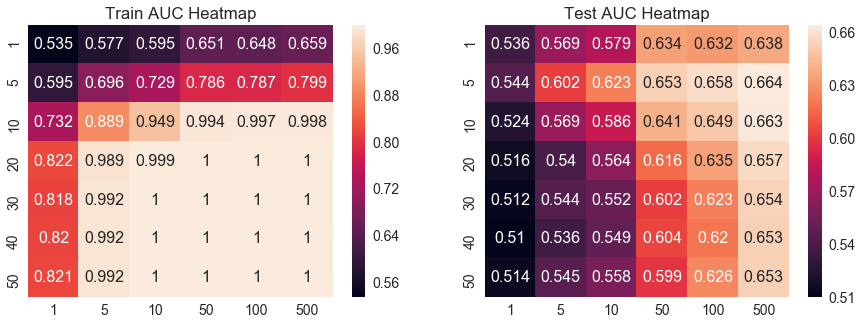

In [169]:
#Plotting the AUC for Train and CV for Various hyperparameter

train_auc_avg_w2v= model_avg_w2v.cv_results_['mean_train_score']

cv_auc_avg_w2v = model_avg_w2v.cv_results_['mean_test_score'] 



# since we are using both hyperparameter 'n_estimators' and 'max_depth' in parameter grid for GridserachCV
# we get 6 values for each hyperparameter max_depth . one each for n_estimators = [1, 5, 10, 50, 100, 500](len of list is 6) respectively
# we will get keys of param_grid in sorted order and cross product of values is taken (so max_deth each value is checked against
# each value of n_esimators)

# Reshaping to form a matrix of 6 columns(n_estimators) and 7 rows(max_depth)
train_auc_matrix = train_auc_avg_w2v.reshape(7,6)
cv_auc_matrix =    cv_auc_avg_w2v.reshape(7,6)


print(train_auc_matrix.shape, cv_auc_matrix.shape)

print(type(train_auc_matrix) ,  type(cv_auc_matrix))

# Rounding the values in the matrix to two decimal points
train_auc_matrix = np.matrix.round(train_auc_matrix ,3)
cv_auc_matrix = np.matrix.round(cv_auc_matrix ,3)


# plotting the graphs
# Y-axis = max_depth
# X-axis = n_estimators

plt.figure(figsize=(15,5))

df_train =  pd.DataFrame(data = train_auc_matrix , columns =parameters['n_estimators'] , index=parameters['max_depth'])
plt.subplot(1,2,1)
plt.ylabel('max_depth')
plt.xlabel('n_estimators')
plt.title("Train AUC Heatmap")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_train, annot=True,annot_kws={"size": 16}, fmt='g' , xticklabels =True ,yticklabels =True)


df_cv =  pd.DataFrame(data = cv_auc_matrix , columns =parameters['n_estimators'] , index=parameters['max_depth'])
plt.subplot(1,2,2)
plt.ylabel('max_depth')
plt.xlabel('n_estimators')
plt.title("Test AUC Heatmap")
sns.set(font_scale=1.4)#for label size

fig =sns.heatmap(df_cv, annot=True,annot_kws={"size": 16}, fmt='g', xticklabels =True ,yticklabels =True)

plt.show()



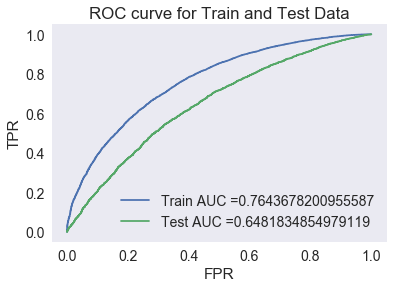

In [142]:
import math

clf = RandomForestClassifier(class_weight = 'balanced' , n_jobs = -1 , n_estimators= optimal_n_estimators_avg_w2v , max_depth=optimal_max_depth_avg_w2v)
clf.fit(X_train_avg_w2v, y_train)


# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

# y_train_pred = batch_predict_proba(neigh, X_train_avg_w2v)    
# y_test_pred = batch_predict_proba(neigh, X_test_avg_w2v)

y_train_pred = clf.predict_proba(X_train_avg_w2v)[:,1]
y_test_pred = clf.predict_proba(X_test_avg_w2v)[:,1]



train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for Train and Test Data")
plt.grid()
plt.show()


##### AUC for test data is 0.648

the maximum value of tpr*(1-fpr) 0.4805907775736524 for threshold 0.507
Classification Report: 

             precision    recall  f1-score   support

          0       0.29      0.71      0.41      5168
          1       0.93      0.68      0.78     28332

avg / total       0.83      0.68      0.73     33500

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]

[[ 3657  1511]
 [ 9090 19242]]


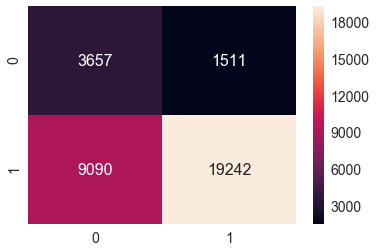

In [143]:
print("="*100)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_train  = predict(y_train_pred, train_thresholds, train_fpr, train_tpr)

print("Classification Report: \n")
print(classification_report(y_train, custom_predict_train))
print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_train, custom_predict_train))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, custom_predict_train), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


the maximum value of tpr*(1-fpr) 0.3739870065722623 for threshold 0.512
Classification Report: 

             precision    recall  f1-score   support

          0       0.22      0.62      0.33      2546
          1       0.90      0.61      0.72     13954

avg / total       0.79      0.61      0.66     16500

Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

[[1567  979]
 [5475 8479]]


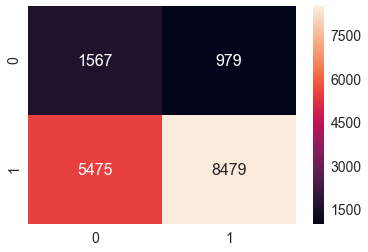

In [144]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_test  = predict(y_test_pred, test_thresholds, test_fpr, test_tpr)

print("Classification Report: \n")
print(classification_report(y_test, custom_predict_test))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_test, custom_predict_test))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, custom_predict_test), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [145]:
# saving a model to harddisk using pickle

savetofile(clf,'RFDT_AVG_W2V')
openfromfile('RFDT_AVG_W2V')

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

RF =  RandomForestClassifier(class_weight = 'balanced' , n_jobs = -1)
#Performing Naive Bayes using gridsearchcv
parameters = {'n_estimators' : [1, 5, 10, 50, 100, 500]  ,'max_depth':[1, 5, 10 ,20 ,30 ,40 ,50] }

model_tfidf_w2v = GridSearchCV(RF,parameters,cv=3,scoring='roc_auc')
model_tfidf_w2v.fit(X_train_tfidf_w2v,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 50, 100, 500], 'max_depth': [1, 5, 10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [153]:
# Printing the best hyperparameter and AUC we get when we use obtained hyperparameter for building the model

print("Best HyperParameter from GridSearch: ",model_tfidf_w2v.best_params_)
print("Best AUC Score: %.2f%%"%(model_tfidf_w2v.best_score_*100))

optimal_n_estimators_tfidf_w2v = model_tfidf_w2v.best_params_['n_estimators']
optimal_max_depth_tfidf_w2v = model_tfidf_w2v.best_params_['max_depth']
print(optimal_n_estimators_tfidf_w2v , optimal_max_depth_tfidf_w2v)
print(model_tfidf_w2v.best_index_)

Best HyperParameter from GridSearch:  {'max_depth': 5, 'n_estimators': 500}
Best AUC Score: 64.23%
500 5
11


(7, 6) (7, 6)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


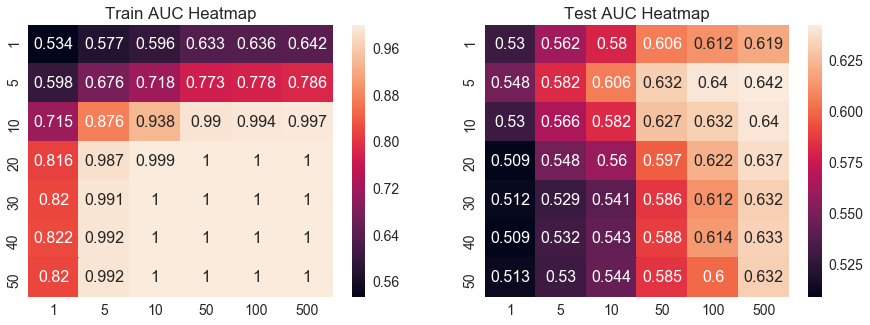

In [170]:
#Plotting the AUC for Train and CV for Various hyperparameter

train_auc_tfidf_w2v= model_tfidf_w2v.cv_results_['mean_train_score']

cv_auc_tfidf_w2v = model_tfidf_w2v.cv_results_['mean_test_score'] 


# since we are using both hyperparameter 'n_estimators' and 'max_depth' in parameter grid for GridserachCV
# we get 6 values for each hyperparameter max_depth . one each for n_estimators = [1, 5, 10, 50, 100, 500](len of list is 6) respectively
# we will get keys of param_grid in sorted order and cross product of values is taken (so max_deth each value is checked against
# each value of n_esimators)

# Reshaping to form a matrix of 6 columns(n_estimators) and 7 rows(max_depth)
train_auc_matrix = train_auc_tfidf_w2v.reshape(7,6)
cv_auc_matrix =    cv_auc_tfidf_w2v.reshape(7,6)


print(train_auc_matrix.shape, cv_auc_matrix.shape)

print(type(train_auc_matrix) ,  type(cv_auc_matrix))

# Rounding the values in the matrix to two decimal points
train_auc_matrix = np.matrix.round(train_auc_matrix ,3)
cv_auc_matrix = np.matrix.round(cv_auc_matrix ,3)


# plotting the graphs
# Y-axis = max_depth
# X-axis = n_estimators

plt.figure(figsize=(15,5))

df_train =  pd.DataFrame(data = train_auc_matrix , columns =parameters['n_estimators'] , index=parameters['max_depth'])
plt.subplot(1,2,1)
plt.ylabel('max_depth')
plt.xlabel('n_estimators')
plt.title("Train AUC Heatmap")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_train, annot=True,annot_kws={"size": 16}, fmt='g' , xticklabels =True ,yticklabels =True)


df_cv =  pd.DataFrame(data = cv_auc_matrix , columns =parameters['n_estimators'] , index=parameters['max_depth'])
plt.subplot(1,2,2)
plt.ylabel('max_depth')
plt.xlabel('n_estimators')
plt.title("Test AUC Heatmap")
sns.set(font_scale=1.4)#for label size

fig =sns.heatmap(df_cv, annot=True,annot_kws={"size": 16}, fmt='g', xticklabels =True ,yticklabels =True)

plt.show()



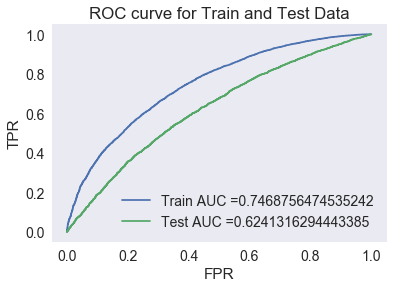

In [149]:
import math

clf = RandomForestClassifier(class_weight = 'balanced' , n_jobs = -1 , n_estimators= optimal_n_estimators_tfidf_w2v , max_depth=optimal_max_depth_tfidf_w2v)
clf.fit(X_train_tfidf_w2v, y_train)


# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

# y_train_pred = batch_predict_proba(neigh, X_train_tfidf_w2v)    
# y_test_pred = batch_predict_proba(neigh, X_test_tfidf_w2v)

y_train_pred = clf.predict_proba(X_train_tfidf_w2v)[:,1]
y_test_pred = clf.predict_proba(X_test_tfidf_w2v)[:,1]



train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for Train and Test Data")
plt.grid()
plt.show()


##### AUC for test data is 0.624

the maximum value of tpr*(1-fpr) 0.460644742415123 for threshold 0.5
Classification Report: 

             precision    recall  f1-score   support

          0       0.28      0.67      0.40      5168
          1       0.92      0.69      0.79     28332

avg / total       0.82      0.69      0.73     33500

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]

[[ 3450  1718]
 [ 8782 19550]]


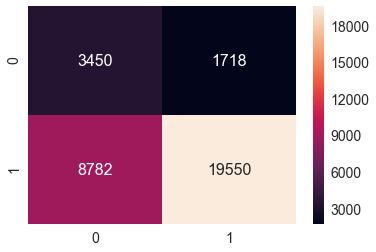

In [150]:
print("="*100)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_train  = predict(y_train_pred, train_thresholds, train_fpr, train_tpr)

print("Classification Report: \n")
print(classification_report(y_train, custom_predict_train))
print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_train, custom_predict_train))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, custom_predict_train), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


the maximum value of tpr*(1-fpr) 0.3526875590890549 for threshold 0.508
Classification Report: 

             precision    recall  f1-score   support

          0       0.21      0.59      0.31      2546
          1       0.89      0.60      0.72     13954

avg / total       0.78      0.60      0.65     16500

Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

[[1497 1049]
 [5584 8370]]


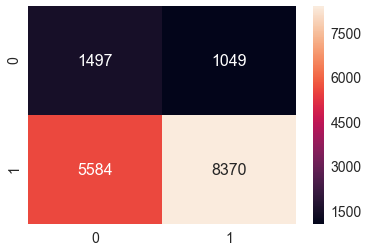

In [151]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_test  = predict(y_test_pred, test_thresholds, test_fpr, test_tpr)

print("Classification Report: \n")
print(classification_report(y_test, custom_predict_test))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_test, custom_predict_test))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, custom_predict_test), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [152]:
# saving a model to harddisk using pickle

savetofile(clf,'RFDT_TFIDF_W2V')
openfromfile('RFDT_TFIDF_W2V')

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

### XGBOOST

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [61]:
import xgboost as xgb

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc


GB =  xgb.XGBClassifier(n_jobs=-1 )
#Performing Naive Bayes using gridsearchcv
parameters = {'n_estimators' : [1, 5, 10, 50, 100, 500]  ,'max_depth':[1, 2, 3, 4, 5, 10] }

xgb_model = GridSearchCV(GB,parameters,cv=3,scoring='roc_auc')
xgb_model.fit(X_train_bow,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 50, 100, 500], 'max_depth': [1, 2, 3, 4, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [64]:
# Printing the best hyperparameter and AUC we get when we use obtained hyperparameter for building the model

print("Best HyperParameter from GridSearch: ",xgb_model.best_params_)
print("Best AUC Score: %.2f%%"%(xgb_model.best_score_*100))

n_estimators_bow = xgb_model.best_params_['n_estimators']
max_depth_bow = xgb_model.best_params_['max_depth']
print(n_estimators_bow , max_depth_bow)

Best HyperParameter from GridSearch:  {'max_depth': 2, 'n_estimators': 500}
Best AUC Score: 70.68%
500 2


(6, 6) (6, 6)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


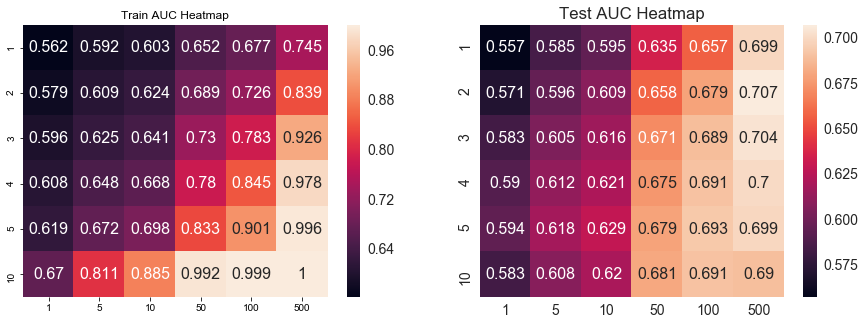

In [66]:
#Plotting the AUC for Train and CV for Various hyperparameter

train_auc_bow= xgb_model.cv_results_['mean_train_score']

cv_auc_bow = xgb_model.cv_results_['mean_test_score'] 


# since we are using both hyperparameter 'n_estimators' and 'max_depth' in parameter grid for GridserachCV
# we get 6 values for each hyperparameter max_depth . one each for n_estimators = [1, 5, 10, 50, 100, 500](len of list is 6) respectively
# we will get keys of param_grid in sorted order and cross product of values is taken (so max_deth each value is checked against
# each value of n_esimators)

# Reshaping to form a matrix of 6 columns(n_estimators) and 6 rows(max_depth)
train_auc_matrix = train_auc_bow.reshape(6,6)
cv_auc_matrix =    cv_auc_bow.reshape(6,6)


print(train_auc_matrix.shape, cv_auc_matrix.shape)

print(type(train_auc_matrix) ,  type(cv_auc_matrix))

# Rounding the values in the matrix to two decimal points
train_auc_matrix = np.matrix.round(train_auc_matrix ,3)
cv_auc_matrix = np.matrix.round(cv_auc_matrix ,3)


# plotting the graphs
# Y-axis = max_depth
# X-axis = n_estimators

plt.figure(figsize=(15,5))

df_train =  pd.DataFrame(data = train_auc_matrix , columns =parameters['n_estimators'] , index=parameters['max_depth'])
plt.subplot(1,2,1)
plt.ylabel('max_depth')
plt.xlabel('n_estimators')
plt.title("Train AUC Heatmap")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_train, annot=True,annot_kws={"size": 16}, fmt='g' , xticklabels =True ,yticklabels =True)


df_cv =  pd.DataFrame(data = cv_auc_matrix , columns =parameters['n_estimators'] , index=parameters['max_depth'])
plt.subplot(1,2,2)
plt.ylabel('max_depth')
plt.xlabel('n_estimators')
plt.title("Test AUC Heatmap")
sns.set(font_scale=1.4)#for label size

fig =sns.heatmap(df_cv, annot=True,annot_kws={"size": 16}, fmt='g', xticklabels =True ,yticklabels =True)

plt.show()



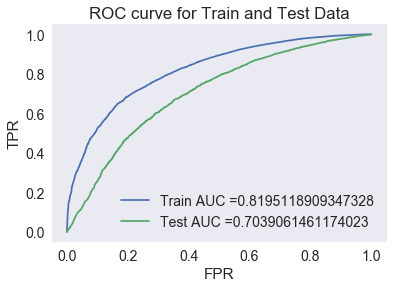

In [68]:
import math
from sklearn.calibration import CalibratedClassifierCV

base_clf = xgb.XGBClassifier(n_jobs=-1 , n_estimators = n_estimators_bow , max_depth = max_depth_bow )
clf = CalibratedClassifierCV(base_estimator = base_clf , method = 'isotonic')
clf.fit(X_train_bow, y_train)


# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

# y_train_pred = batch_predict_proba(neigh, X_train_bow)    
# y_test_pred = batch_predict_proba(neigh, X_test_bow)

y_train_pred = clf.predict_proba(X_train_bow)[:,1]
y_test_pred = clf.predict_proba(X_test_bow)[:,1]



train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for Train and Test Data")
plt.grid()
plt.show()


##### AUC value for test data is 0.703

In [69]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshold, fpr, tpr):
    
    t = threshold[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.5508880849537702 for threshold 0.832
Classification Report: 

             precision    recall  f1-score   support

          0       0.33      0.78      0.46      5168
          1       0.95      0.71      0.81     28332

avg / total       0.85      0.72      0.76     33500

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]

[[ 4007  1161]
 [ 8202 20130]]


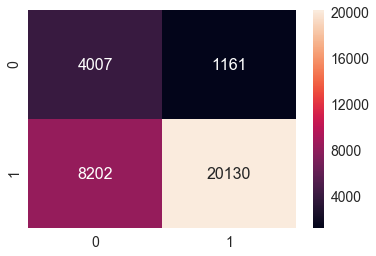

In [70]:
print("="*100)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_train  = predict(y_train_pred, train_thresholds, train_fpr, train_tpr)

print("Classification Report: \n")
print(classification_report(y_train, custom_predict_train))
print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_train, custom_predict_train))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, custom_predict_train), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


the maximum value of tpr*(1-fpr) 0.4327789062502639 for threshold 0.836
Classification Report: 

             precision    recall  f1-score   support

          0       0.26      0.65      0.37      2546
          1       0.91      0.67      0.77     13954

avg / total       0.81      0.67      0.71     16500

Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

[[1646  900]
 [4613 9341]]


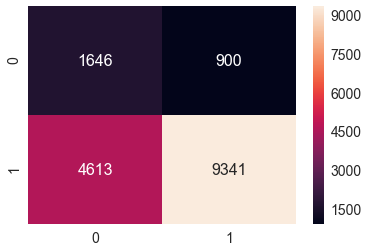

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_test  = predict(y_test_pred, test_thresholds, test_fpr, test_tpr)

print("Classification Report: \n")
print(classification_report(y_test, custom_predict_test))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_test, custom_predict_test))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, custom_predict_test), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [72]:
# saving a model to harddisk using pickle

savetofile(clf,'GBDT_BOW')
openfromfile('GBDT_BOW')

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
       n_estimators=500, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
            cv=3, method='isotonic')

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc


GB =  xgb.XGBClassifier(n_jobs=-1 )
#Performing Naive Bayes using gridsearchcv
parameters = {'n_estimators' : [1, 5, 10, 50, 100, 500]  ,'max_depth':[1, 2, 3, 4, 5, 10] }

xgb_model_tfidf = GridSearchCV(GB,parameters,cv=3,scoring='roc_auc')
xgb_model_tfidf.fit(X_train_tfidf,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 50, 100, 500], 'max_depth': [1, 2, 3, 4, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [74]:
# Printing the best hyperparameter and AUC we get when we use obtained hyperparameter for building the model

print("Best HyperParameter from GridSearch: ",xgb_model_tfidf.best_params_)
print("Best AUC Score: %.2f%%"%(xgb_model_tfidf.best_score_*100))

n_estimators_tfidf = xgb_model_tfidf.best_params_['n_estimators']
max_depth_tfidf = xgb_model_tfidf.best_params_['max_depth']
print(n_estimators_tfidf , max_depth_tfidf)

Best HyperParameter from GridSearch:  {'max_depth': 2, 'n_estimators': 500}
Best AUC Score: 69.88%
500 2


(6, 6) (6, 6)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


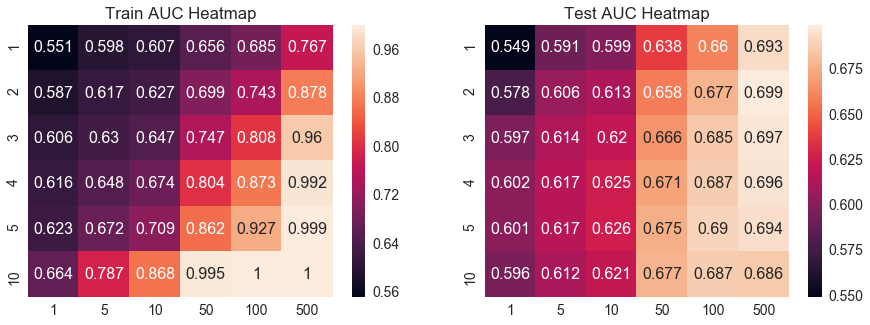

In [75]:
#Plotting the AUC for Train and CV for Various hyperparameter

train_auc_tfidf= xgb_model_tfidf.cv_results_['mean_train_score']

cv_auc_tfidf = xgb_model_tfidf.cv_results_['mean_test_score'] 


# since we are using both hyperparameter 'n_estimators' and 'max_depth' in parameter grid for GridserachCV
# we get 6 values for each hyperparameter max_depth . one each for n_estimators = [1, 5, 10, 50, 100, 500](len of list is 6) respectively
# we will get keys of param_grid in sorted order and cross product of values is taken (so max_deth each value is checked against
# each value of n_esimators)

# Reshaping to form a matrix of 6 columns(n_estimators) and 6 rows(max_depth)
train_auc_matrix = train_auc_tfidf.reshape(6,6)
cv_auc_matrix =    cv_auc_tfidf.reshape(6,6)


print(train_auc_matrix.shape, cv_auc_matrix.shape)

print(type(train_auc_matrix) ,  type(cv_auc_matrix))

# Rounding the values in the matrix to two decimal points
train_auc_matrix = np.matrix.round(train_auc_matrix ,3)
cv_auc_matrix = np.matrix.round(cv_auc_matrix ,3)


# plotting the graphs
# Y-axis = max_depth
# X-axis = n_estimators

plt.figure(figsize=(15,5))

df_train =  pd.DataFrame(data = train_auc_matrix , columns =parameters['n_estimators'] , index=parameters['max_depth'])
plt.subplot(1,2,1)
plt.ylabel('max_depth')
plt.xlabel('n_estimators')
plt.title("Train AUC Heatmap")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_train, annot=True,annot_kws={"size": 16}, fmt='g' , xticklabels =True ,yticklabels =True)


df_cv =  pd.DataFrame(data = cv_auc_matrix , columns =parameters['n_estimators'] , index=parameters['max_depth'])
plt.subplot(1,2,2)
plt.ylabel('max_depth')
plt.xlabel('n_estimators')
plt.title("Test AUC Heatmap")
sns.set(font_scale=1.4)#for label size

fig =sns.heatmap(df_cv, annot=True,annot_kws={"size": 16}, fmt='g', xticklabels =True ,yticklabels =True)

plt.show()



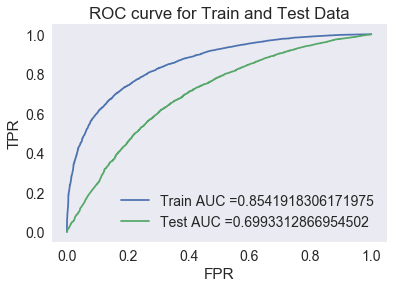

In [76]:
import math
from sklearn.calibration import CalibratedClassifierCV

base_clf = xgb.XGBClassifier(n_jobs=-1 , n_estimators = n_estimators_tfidf , max_depth = max_depth_tfidf )
clf = CalibratedClassifierCV(base_estimator = base_clf , method = 'isotonic')
clf.fit(X_train_tfidf, y_train)


# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

# y_train_pred = batch_predict_proba(neigh, X_train_tfidf)    
# y_test_pred = batch_predict_proba(neigh, X_test_tfidf)

y_train_pred = clf.predict_proba(X_train_tfidf)[:,1]
y_test_pred = clf.predict_proba(X_test_tfidf)[:,1]



train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for Train and Test Data")
plt.grid()
plt.show()


##### AUC value for test data is 0.699

the maximum value of tpr*(1-fpr) 0.5946303797104566 for threshold 0.823
Classification Report: 

             precision    recall  f1-score   support

          0       0.37      0.78      0.50      5168
          1       0.95      0.76      0.84     28332

avg / total       0.86      0.76      0.79     33500

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]

[[ 4049  1119]
 [ 6829 21503]]


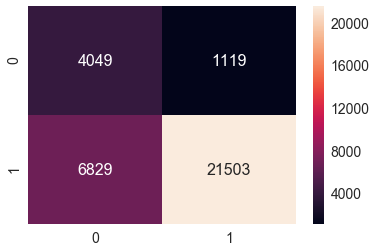

In [77]:
print("="*100)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_train  = predict(y_train_pred, train_thresholds, train_fpr, train_tpr)

print("Classification Report: \n")
print(classification_report(y_train, custom_predict_train))
print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_train, custom_predict_train))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, custom_predict_train), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


the maximum value of tpr*(1-fpr) 0.4292563344423901 for threshold 0.842
Classification Report: 

             precision    recall  f1-score   support

          0       0.26      0.66      0.37      2546
          1       0.91      0.65      0.76     13954

avg / total       0.81      0.65      0.70     16500

Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

[[1674  872]
 [4844 9110]]


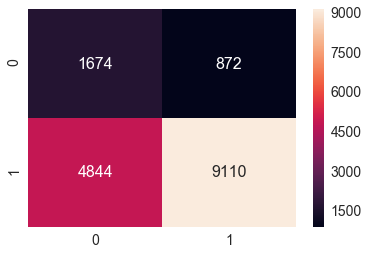

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_test  = predict(y_test_pred, test_thresholds, test_fpr, test_tpr)

print("Classification Report: \n")
print(classification_report(y_test, custom_predict_test))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_test, custom_predict_test))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, custom_predict_test), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [79]:
# saving a model to harddisk using pickle

savetofile(clf,'GBDT_TFIDF')
openfromfile('GBDT_TFIDF')

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
       n_estimators=500, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
            cv=3, method='isotonic')

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc


GB =  xgb.XGBClassifier(n_jobs=-1 )
#Performing Naive Bayes using gridsearchcv
parameters = {'n_estimators' : [1, 5, 10, 50, 100, 500]  ,'max_depth':[1, 2, 3, 4, 5, 10] }

xgb_model_avg_w2v = GridSearchCV(GB,parameters,cv=3,scoring='roc_auc')
xgb_model_avg_w2v.X_train_avg_w2vg_w2vn_avg_w2v,y_train)

In [88]:
# Printing the best hyperparameter and AUC we get when we use obtained hyperparameter for building the model

print("Best HyperParameter from GridSearch: ",xgb_model_avg_w2v.best_params_)
print("Best AUC Score: %.2f%%"%(xgb_model_avg_w2v.best_score_*100))

n_estimators_avg_w2v = xgb_model_avg_w2v.best_params_['n_estimators']
max_depth_avg_w2v = xgb_model_avg_w2v.best_params_['max_depth']
print(n_estimators_avg_w2v , max_depth_avg_w2v)

Best HyperParameter from GridSearch:  {'max_depth': 2, 'n_estimators': 500}
Best AUC Score: 68.28%
500 2


(6, 6) (6, 6)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


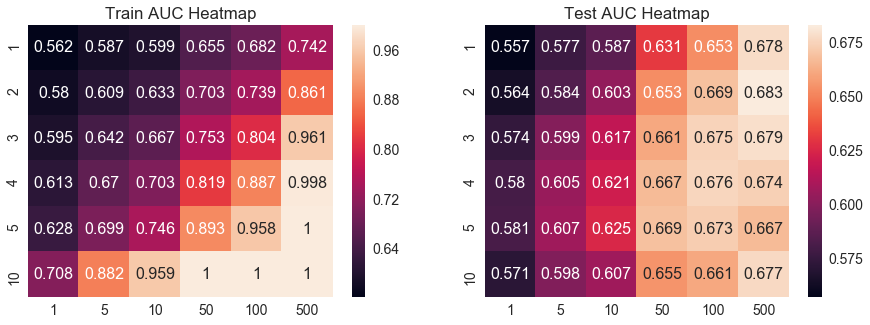

In [89]:
#Plotting the AUC for Train and CV for Various hyperparameter

train_auc_avg_w2v= xgb_model_avg_w2v.cv_results_['mean_train_score']

cv_auc_avg_w2v = xgb_model_avg_w2v.cv_results_['mean_test_score'] 


# since we are using both hyperparameter 'n_estimators' and 'max_depth' in parameter grid for GridserachCV
# we get 6 values for each hyperparameter max_depth . one each for n_estimators = [1, 5, 10, 50, 100, 500](len of list is 6) respectively
# we will get keys of param_grid in sorted order and cross product of values is taken (so max_deth each value is checked against
# each value of n_esimators)

# Reshaping to form a matrix of 6 columns(n_estimators) and 6 rows(max_depth)
train_auc_matrix = train_auc_avg_w2v.reshape(6,6)
cv_auc_matrix =    cv_auc_avg_w2v.reshape(6,6)


print(train_auc_matrix.shape, cv_auc_matrix.shape)

print(type(train_auc_matrix) ,  type(cv_auc_matrix))

# Rounding the values in the matrix to two decimal points
train_auc_matrix = np.matrix.round(train_auc_matrix ,3)
cv_auc_matrix = np.matrix.round(cv_auc_matrix ,3)


# plotting the graphs
# Y-axis = max_depth
# X-axis = n_estimators

plt.figure(figsize=(15,5))

df_train =  pd.DataFrame(data = train_auc_matrix , columns =parameters['n_estimators'] , index=parameters['max_depth'])
plt.subplot(1,2,1)
plt.ylabel('max_depth')
plt.xlabel('n_estimators')
plt.title("Train AUC Heatmap")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_train, annot=True,annot_kws={"size": 16}, fmt='g' , xticklabels =True ,yticklabels =True)


df_cv =  pd.DataFrame(data = cv_auc_matrix , columns =parameters['n_estimators'] , index=parameters['max_depth'])
plt.subplot(1,2,2)
plt.ylabel('max_depth')
plt.xlabel('n_estimators')
plt.title("Test AUC Heatmap")
sns.set(font_scale=1.4)#for label size

fig =sns.heatmap(df_cv, annot=True,annot_kws={"size": 16}, fmt='g', xticklabels =True ,yticklabels =True)

plt.show()



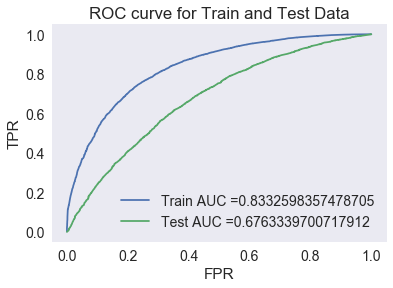

In [90]:
import math
from sklearn.calibration import CalibratedClassifierCV

base_clf = xgb.XGBClassifier(n_jobs=-1 , n_estimators = n_estimators_avg_w2v , max_depth = max_depth_avg_w2v )
clf = CalibratedClassifierCV(base_estimator = base_clf , method = 'isotonic')
clf.fit(X_train_avg_w2v, y_train)


# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

# y_train_pred = batch_predict_proba(neigh, X_train_avg_w2v)    
# y_test_pred = batch_predict_proba(neigh, X_test_avg_w2v)

y_train_pred = clf.predict_proba(X_train_avg_w2v)[:,1]
y_test_pred = clf.predict_proba(X_test_avg_w2v)[:,1]



train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for Train and Test Data")
plt.grid()
plt.show()


##### AUC value for test data is 0.676

the maximum value of tpr*(1-fpr) 0.5711236301850372 for threshold 0.829
Classification Report: 

             precision    recall  f1-score   support

          0       0.36      0.75      0.49      5168
          1       0.94      0.76      0.84     28332

avg / total       0.85      0.76      0.79     33500

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]

[[ 3898  1270]
 [ 6879 21453]]


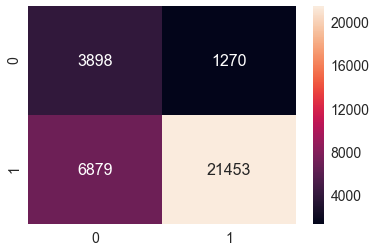

In [91]:
print("="*100)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_train  = predict(y_train_pred, train_thresholds, train_fpr, train_tpr)

print("Classification Report: \n")
print(classification_report(y_train, custom_predict_train))
print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_train, custom_predict_train))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, custom_predict_train), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


the maximum value of tpr*(1-fpr) 0.3993386529480041 for threshold 0.853
Classification Report: 

             precision    recall  f1-score   support

          0       0.24      0.65      0.35      2546
          1       0.91      0.62      0.73     13954

avg / total       0.80      0.62      0.67     16500

Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

[[1647  899]
 [5340 8614]]


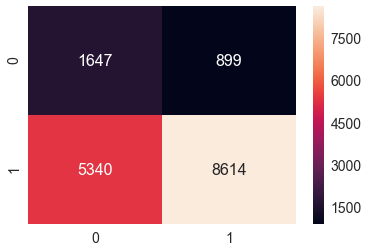

In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_test  = predict(y_test_pred, test_thresholds, test_fpr, test_tpr)

print("Classification Report: \n")
print(classification_report(y_test, custom_predict_test))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_test, custom_predict_test))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, custom_predict_test), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [93]:
# saving a model to harddisk using pickle

savetofile(clf,'GBDT_AVG_W2V')
openfromfile('GBDT_AVG_W2V')

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
       n_estimators=500, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
            cv=3, method='isotonic')

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc


GB =  xgb.XGBClassifier(n_jobs=-1 )
#Performing Naive Bayes using gridsearchcv
parameters = {'n_estimators' : [1, 5, 10, 50, 100, 500]  ,'max_depth':[1, 2, 3, 4, 5, 10] }

xgb_model_tfidf_w2v = GridSearchCV(GB,parameters,cv=3,scoring='roc_auc')
xgb_model_tfidf_w2v.fit(X_train_tfidf_w2v,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 50, 100, 500], 'max_depth': [1, 2, 3, 4, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [97]:
# Printing the best hyperparameter and AUC we get when we use obtained hyperparameter for building the model

print("Best HyperParameter from GridSearch: ",xgb_model_tfidf_w2v.best_params_)
print("Best AUC Score: %.2f%%"%(xgb_model_tfidf_w2v.best_score_*100))

n_estimators_tfidf_w2v = xgb_model_tfidf_w2v.best_params_['n_estimators']
max_depth_tfidf_w2v = xgb_model_tfidf_w2v.best_params_['max_depth']
print(n_estimators_tfidf_w2v , max_depth_tfidf_w2v)

Best HyperParameter from GridSearch:  {'max_depth': 2, 'n_estimators': 500}
Best AUC Score: 65.73%
500 2


(6, 6) (6, 6)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


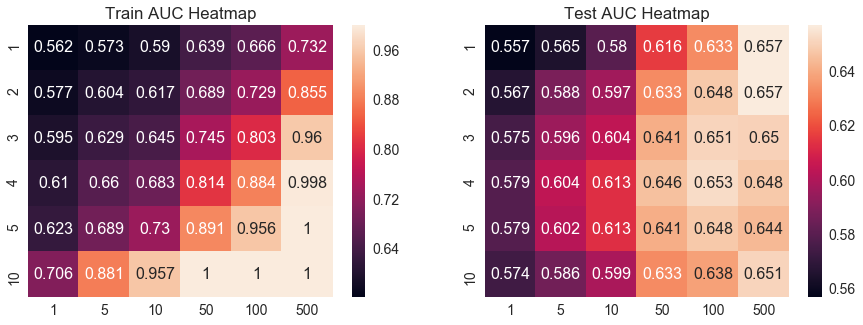

In [98]:
#Plotting the AUC for Train and CV for Various hyperparameter

train_auc_tfidf_w2v= xgb_model_tfidf_w2v.cv_results_['mean_train_score']

cv_auc_tfidf_w2v = xgb_model_tfidf_w2v.cv_results_['mean_test_score'] 


# since we are using both hyperparameter 'n_estimators' and 'max_depth' in parameter grid for GridserachCV
# we get 6 values for each hyperparameter max_depth . one each for n_estimators = [1, 5, 10, 50, 100, 500](len of list is 6) respectively
# we will get keys of param_grid in sorted order and cross product of values is taken (so max_deth each value is checked against
# each value of n_esimators)

# Reshaping to form a matrix of 6 columns(n_estimators) and 6 rows(max_depth)
train_auc_matrix = train_auc_tfidf_w2v.reshape(6,6)
cv_auc_matrix =    cv_auc_tfidf_w2v.reshape(6,6)


print(train_auc_matrix.shape, cv_auc_matrix.shape)

print(type(train_auc_matrix) ,  type(cv_auc_matrix))

# Rounding the values in the matrix to two decimal points
train_auc_matrix = np.matrix.round(train_auc_matrix ,3)
cv_auc_matrix = np.matrix.round(cv_auc_matrix ,3)


# plotting the graphs
# Y-axis = max_depth
# X-axis = n_estimators

plt.figure(figsize=(15,5))

df_train =  pd.DataFrame(data = train_auc_matrix , columns =parameters['n_estimators'] , index=parameters['max_depth'])
plt.subplot(1,2,1)
plt.ylabel('max_depth')
plt.xlabel('n_estimators')
plt.title("Train AUC Heatmap")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_train, annot=True,annot_kws={"size": 16}, fmt='g' , xticklabels =True ,yticklabels =True)


df_cv =  pd.DataFrame(data = cv_auc_matrix , columns =parameters['n_estimators'] , index=parameters['max_depth'])
plt.subplot(1,2,2)
plt.ylabel('max_depth')
plt.xlabel('n_estimators')
plt.title("Test AUC Heatmap")
sns.set(font_scale=1.4)#for label size

fig =sns.heatmap(df_cv, annot=True,annot_kws={"size": 16}, fmt='g', xticklabels =True ,yticklabels =True)

plt.show()



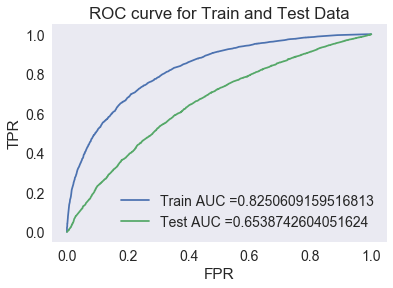

In [99]:
import math
from sklearn.calibration import CalibratedClassifierCV

base_clf = xgb.XGBClassifier(n_jobs=-1 , n_estimators = n_estimators_tfidf_w2v , max_depth = max_depth_tfidf_w2v )
clf = CalibratedClassifierCV(base_estimator = base_clf , method = 'isotonic')
clf.fit(X_train_tfidf_w2v, y_train)


# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

# y_train_pred = batch_predict_proba(neigh, X_train_tfidf_w2v)    
# y_test_pred = batch_predict_proba(neigh, X_test_tfidf_w2v)

y_train_pred = clf.predict_proba(X_train_tfidf_w2v)[:,1]
y_test_pred = clf.predict_proba(X_test_tfidf_w2v)[:,1]



train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for Train and Test Data")
plt.grid()
plt.show()


##### AUC value for test data is 0.654

the maximum value of tpr*(1-fpr) 0.5543337602155599 for threshold 0.83
Classification Report: 

             precision    recall  f1-score   support

          0       0.34      0.76      0.47      5168
          1       0.94      0.73      0.83     28332

avg / total       0.85      0.74      0.77     33500

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]

[[ 3905  1263]
 [ 7547 20785]]


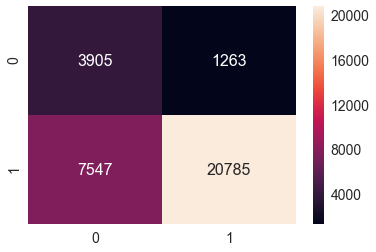

In [100]:
print("="*100)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_train  = predict(y_train_pred, train_thresholds, train_fpr, train_tpr)

print("Classification Report: \n")
print(classification_report(y_train, custom_predict_train))
print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_train, custom_predict_train))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, custom_predict_train), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


the maximum value of tpr*(1-fpr) 0.38368695661572805 for threshold 0.836
Classification Report: 

             precision    recall  f1-score   support

          0       0.23      0.60      0.34      2546
          1       0.90      0.64      0.75     13954

avg / total       0.79      0.64      0.68     16500

Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

[[1521 1025]
 [4992 8962]]


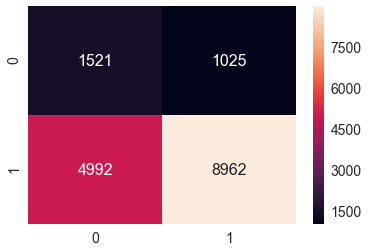

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_test  = predict(y_test_pred, test_thresholds, test_fpr, test_tpr)

print("Classification Report: \n")
print(classification_report(y_test, custom_predict_test))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_test, custom_predict_test))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, custom_predict_test), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [102]:
# saving a model to harddisk using pickle

savetofile(clf,'GBDT_TFIDF_W2V')
openfromfile('GBDT_TFIDF_W2V')

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
       n_estimators=500, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
            cv=3, method='isotonic')

<h1>3. Conclusion</h1>

In [115]:
# Please compare all your models using Prettytable library

from prettytable import PrettyTable

x= PrettyTable()

x.field_names = ["Vectorizer","Model","Hyper Parameter[n_estimators,max_depth]","AUC"]
x.add_row(["BagOfWords","Random Forest DT",[500 ,10],0.695])
x.add_row(["TFIDF","Random Forest DT",[500 ,10],0.678])
x.add_row(["Avg W2V","Random Forest DT",[500, 5],0.648])
x.add_row(["TFIDF W2V","Random Forest DT",[500, 5],0.624])


print(x)

+------------+------------------+-----------------------------------------+-------+
| Vectorizer |      Model       | Hyper Parameter[n_estimators,max_depth] |  AUC  |
+------------+------------------+-----------------------------------------+-------+
| BagOfWords | Random Forest DT |                [500, 10]                | 0.695 |
|   TFIDF    | Random Forest DT |                [500, 10]                | 0.678 |
|  Avg W2V   | Random Forest DT |                 [500, 5]                | 0.648 |
| TFIDF W2V  | Random Forest DT |                 [500, 5]                | 0.624 |
+------------+------------------+-----------------------------------------+-------+


#### Conclusions:

1) Random Forest worked fairly well for all the feature sets

2) Random Forest worked best with BOW feature set with AUC = 0.695

3) Random Forest takes more time to train compared to other algorithms



In [105]:
# Please compare all your models using Prettytable library

from prettytable import PrettyTable

x= PrettyTable()

x.field_names = ["Vectorizer","Model","Hyper Parameter[n_estimators,max_depth]","AUC"]
x.add_row(["BagOfWords","Gradient Boosting DT",[500 ,2],0.703])
x.add_row(["TFIDF","Gradient Boosting DT",[500 ,2],0.70])
x.add_row(["Avg W2V","Gradient Boosting DT",[500, 2],0.676])
x.add_row(["TFIDF W2V","Gradient Boosting DT",[500, 2],0.654])


print(x)

+------------+----------------------+-----------------------------------------+-------+
| Vectorizer |        Model         | Hyper Parameter[n_estimators,max_depth] |  AUC  |
+------------+----------------------+-----------------------------------------+-------+
| BagOfWords | Gradient Boosting DT |                 [500, 2]                | 0.703 |
|   TFIDF    | Gradient Boosting DT |                 [500, 2]                |  0.7  |
|  Avg W2V   | Gradient Boosting DT |                 [500, 2]                | 0.676 |
| TFIDF W2V  | Gradient Boosting DT |                 [500, 2]                | 0.654 |
+------------+----------------------+-----------------------------------------+-------+


#### Conclusions:

1) Gradient Boosting worked fairly well for all the feature sets and fared well in comparision to Random Forest

2) Gradient Boosting worked best with TFIDF feature set with AUC = 0.703

3) Training Gradient Boosting model is computationally intensive and takes time to train

